In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as nplin

## Defining variables from given information

In [14]:
samples = 1250
params = 2
bins = 31

## Opening files and storing the data

In [15]:
Data = open('jla_mub_0.txt', 'r')
z, mu = np.loadtxt(Data, unpack=True, usecols=[0,1])
print(z)
print(mu)

Covariance = np.loadtxt('jla_mub_covmatrix.txt')
Cov_matrix = np.reshape(Covariance,(bins, bins))
Cov_inverse = nplin.inv(Cov_matrix)

[0.01  0.012 0.014 0.016 0.019 0.023 0.026 0.031 0.037 0.043 0.051 0.06
 0.07  0.082 0.097 0.114 0.134 0.158 0.186 0.218 0.257 0.302 0.355 0.418
 0.491 0.578 0.679 0.799 0.94  1.105 1.3  ]
[32.95388698 33.87900347 33.84214074 34.11856704 34.59344598 34.93902653
 35.25209633 35.74850165 36.06978761 36.43457047 36.65111059 37.15801411
 37.43017325 37.95661635 38.25325404 38.61286934 39.06785071 39.3414019
 39.79214362 40.1565346  40.56495606 40.90528778 41.42141744 41.79092346
 42.23146107 42.61704707 43.05273149 43.50415083 43.97257341 44.51408758
 44.82186746]


## Defining functions to calculate likelihood

In [16]:
def Eta(a, Omega_m):
    if Omega_m >= 0.999:
        Omega_m = 0.999
    elif Omega_m <= 0.2:
        Omega_m = 0.2
    else:
        pass
    
    s = ((1.0 - Omega_m)/Omega_m)**(1.0/3.0)
    ETA = 2.0*(np.sqrt((s**3.0) + 1.0))*(1/(a**4) - 0.1540*(s/(a**3)) + 0.4304*((s*s)/(a*a)) + 0.19097*((s**3)/a) + 0.066941*(s**4))**(-1.0/8.0)
    return ETA


def Distance_L(z, Omega_m):
    Eta_1 = Eta(1, Omega_m)
    Eta_2 = Eta(1/(1+z), Omega_m)
    
    D_L = ((3000.0)*(1+z))*(Eta_1 - Eta_2)
    return D_L


def mu_th(z,Omega_m,h):
    d_L = Distance_L(z, Omega_m)
    Mu = 25 - (5*np.log10(h)) + (5*np.log10(d_L))
    return Mu


Differ = np.empty(bins)

def Likelihood(Omega_m,h,z,mu):
    if Omega_m <= 0.0 or h <= 0.0:
        L = -1.e100
    else:
        for i in range(bins):
            Differ[i] = mu[i] - mu_th(z[i], Omega_m, h)
            
        Dot_1 = np.dot(Cov_inverse, Differ)
        L = -0.5*(np.dot(np.transpose(Differ), Dot_1))
    return L

## Sampling of parameters from posterior distribution using gaussian prior

In [17]:
samp_par = np.empty([samples, params+1])     # This array will contain sampled values of the two parameters

Omega_sigma = 0.01
h_sigma = 0.024                     # standard deviation of hubble parameter according to question 
chain_num = 20                      ## Choosing that there will be total 20 chains and each chain having 1250 sample points

Omega_next = 0
h_next = 0
L_pre = 0
L_next = 0
Accept = 0
reject = 125

Omega_mean_c = []
Omega_var_c = []
h_mean_c = []
h_var_c = []

In [18]:
np.random.seed(0)

for j in range(chain_num):
    samp_par[0,0] = np.random.uniform()         
    samp_par[0,1] = np.random.normal(0.738, h_sigma)     
    samp_par[0,2] = Likelihood(samp_par[0,0],samp_par[0,1],z,mu)
    
    for i in range(1, samples):
        L_pre = samp_par[i-1,2]
        Omega_next = np.random.normal(samp_par[i-1,0], Omega_sigma)
        h_next = np.random.normal(samp_par[i-1,1], h_sigma)
        L_next = Likelihood(Omega_next, h_next, z, mu)
    
        if L_next >= L_pre:
            samp_par[i,0] = Omega_next
            samp_par[i,1] = h_next
            samp_par[i,2] = L_next
            Accept = Accept + 1
            print("Step is accepted with high likelihood")
        
        else:
            B = np.random.uniform()
            if (L_next - L_pre) > np.log(B):
                samp_par[i,0] = Omega_next
                samp_par[i,1] = h_next
                samp_par[i,2] = L_next
                Accept = Accept + 1
                print("Step is accepted with low likelihood")
            
            else:
                samp_par[i,0] = samp_par[i-1,0]
                samp_par[i,1] = samp_par[i-1,1]
                samp_par[i,2] = L_pre
                print("The step is rejected")
    
    MEAN_O = np.mean(samp_par[reject:,0])
    Omega_mean_c.append(MEAN_O)
    
    MEAN_h = np.mean(samp_par[reject:,1])
    h_mean_c.append(MEAN_h)
    
    VAR_O = np.var(samp_par[reject:,0])
    Omega_var_c.append(VAR_O)
    
    VAR_h = np.var(samp_par[reject:,1])
    h_var_c.append(VAR_h)


Step is accepted with high likelihood
Step is accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with high likelihood
Step is accepted with low likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with high likelihood
Step is accepted with low likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with high likelihood
Step is accepted with low likelihood
The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is re

In [19]:
print("Mean values of Omega matter from each chain = ", Omega_mean_c)     # These are mean values from each chain
print("\nVariances of Omage matter values from each chain = ", Omega_var_c)
print("\nMean values of h from each chain =", h_mean_c)
print('\nVariances of h values from each chain =', h_var_c)               # these are variance from each chain

Mean values of Omega matter from each chain =  [0.3097065827099958, 0.3165643805357914, 0.345775536724759, 0.3094053932702036, 0.1331968114362143, 0.40503371589820963, 0.37726130011759457, 0.29883615338388586, 0.3434093059555389, 0.22769658343587706, 0.28111655014777165, 0.31618543959355966, 0.32827858111382496, 0.14529966164640148, 0.3441866960290601, 0.3013525996524221, 0.31992854465184456, 0.30861793235750684, 0.27544560584218014, 0.35471128344164965]

Variances of Omage matter values from each chain =  [0.002038187051815408, 0.002405160144168782, 0.010697889535069487, 0.0008971824575468962, 0.013049028000872142, 0.019678757428696327, 0.01493522641289232, 0.0006361228046844684, 0.010059292868274082, 0.009277044926927732, 0.0006135612707183709, 0.0011203330338333461, 0.0006945018512997181, 0.01102430602452975, 0.011389687510872824, 0.0006240698226628837, 0.0016492116410050353, 0.0005859143612597221, 0.0003659817538460097, 0.009522223468010297]

Mean values of h from each chain = [0.7

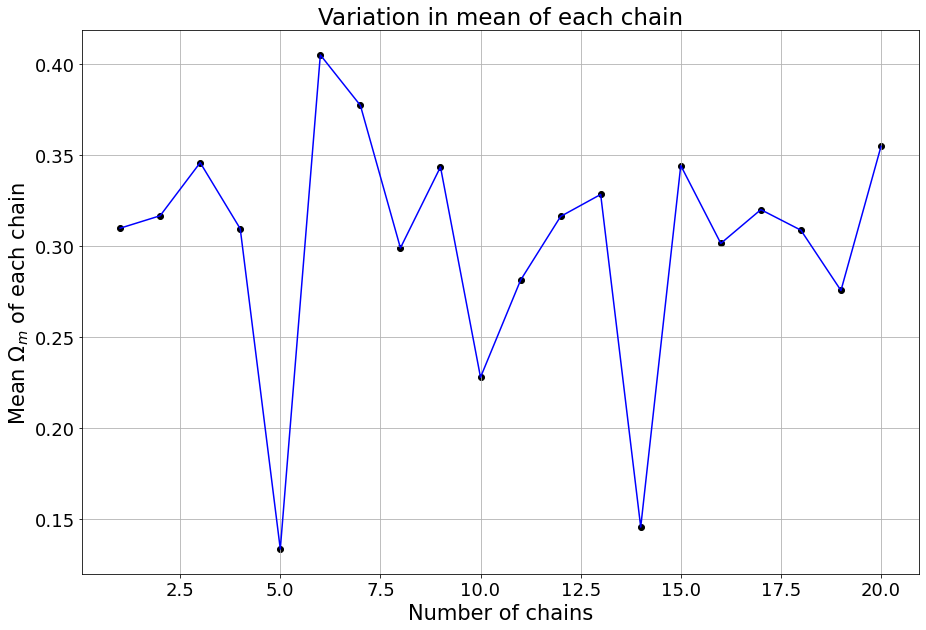

In [20]:
points = np.linspace(1,20,20)

plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 18
plt.plot(points, Omega_mean_c, color='blue')
plt.scatter(points, Omega_mean_c, marker='o', color='black')
plt.title("Variation in mean of each chain", fontsize='23')
plt.xlabel("Number of chains", fontsize='21')
plt.ylabel("Mean $\Omega_m$ of each chain", fontsize='21')
plt.grid(True)
plt.show()

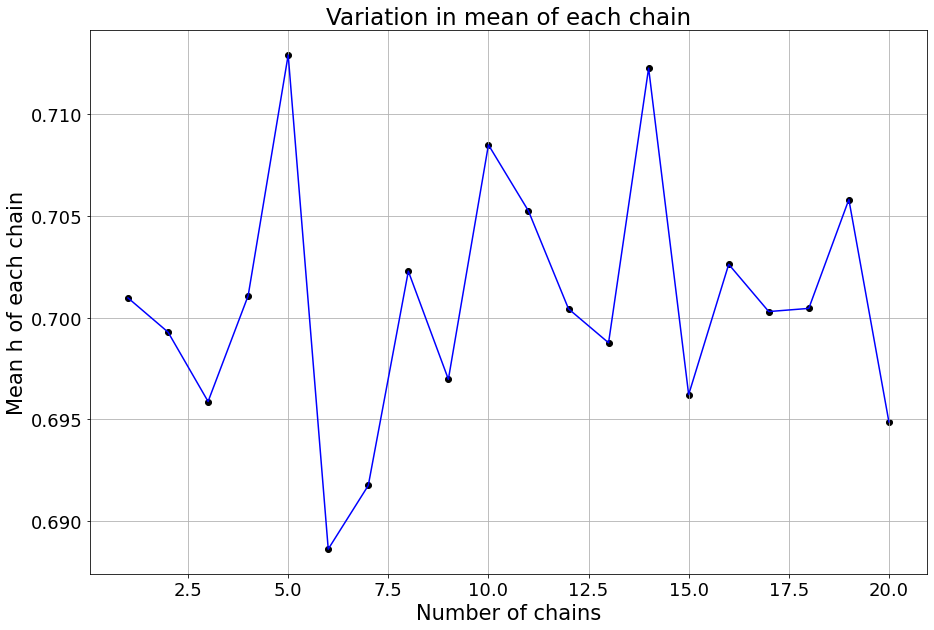

In [21]:
plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 18
plt.plot(points, h_mean_c, color='blue')
plt.scatter(points, h_mean_c, marker='o', color='black')
plt.title("Variation in mean of each chain", fontsize='23')
plt.xlabel("Number of chains", fontsize='21')
plt.ylabel("Mean h of each chain", fontsize='21')
plt.grid(True)
plt.show()

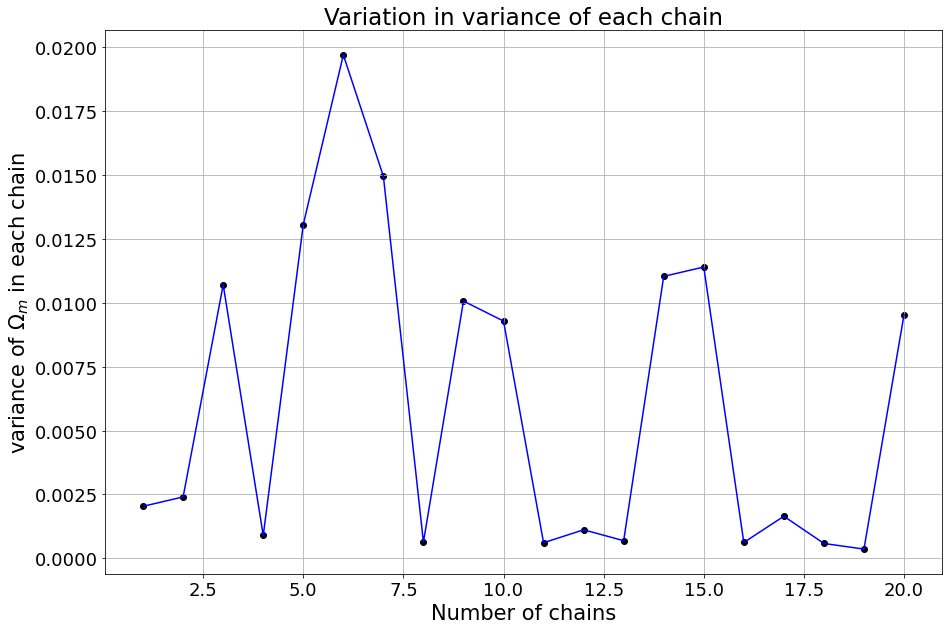

In [22]:
plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 18
plt.plot(points, Omega_var_c, color='blue')
plt.scatter(points, Omega_var_c, marker='o', color='black')
plt.title("Variation in variance of each chain", fontsize='23')
plt.xlabel("Number of chains", fontsize='21')
plt.ylabel("variance of $\Omega_m$ in each chain", fontsize='21')
plt.grid(True)
plt.show()

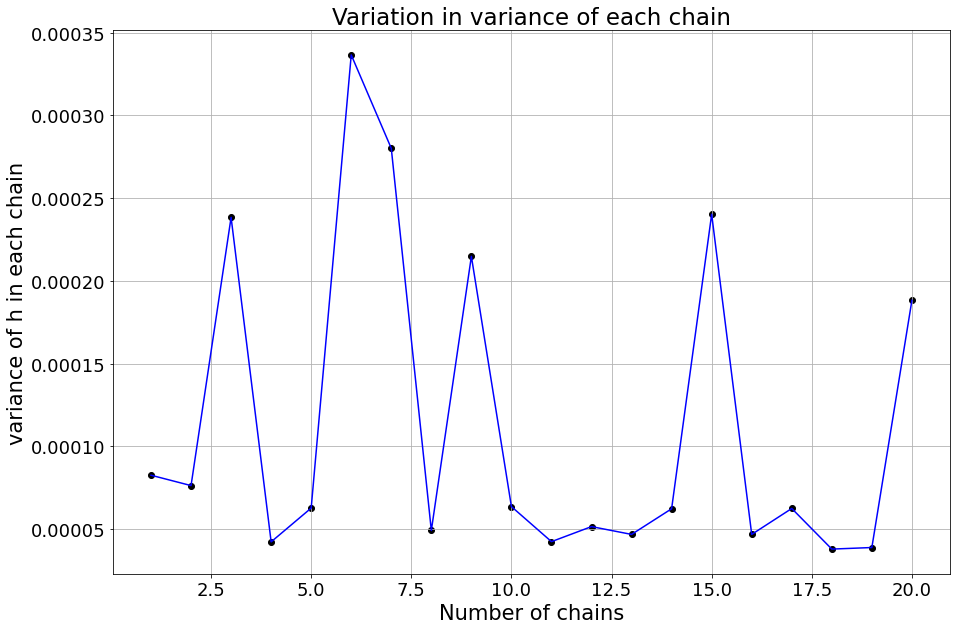

In [23]:
plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 18
plt.plot(points, h_var_c, color='blue')
plt.scatter(points, h_var_c, marker='o', color='black')
plt.title("Variation in variance of each chain", fontsize='23')
plt.xlabel("Number of chains", fontsize='21')
plt.ylabel("variance of h in each chain", fontsize='21')
plt.grid(True)
plt.show()

## Calculating Gelman-Rubin Convergence Ratio

In [24]:
Mean_chain_Omega = np.mean(Omega_mean_c)
print("Mean value of all chains of Omega matter = ", Mean_chain_Omega)
Mean_chain_h = np.mean(h_mean_c)
print("\nMean value of all chains of h = ", Mean_chain_h)

Mean_var_ch_O = np.mean(Omega_var_c)
print("\nMean of all the chain's varaiance of Omega matter = ", Mean_var_ch_O)
Mean_var_ch_h = np.mean(h_var_c)
print("\nMean of all the chain's varaiance of h = ", Mean_var_ch_h)

Var_mean_ch_O = np.var(Omega_mean_c)
print("\nEmpirical variance of each chain's mean values for omega matter = ", Var_mean_ch_O)
Var_mean_ch_h = np.var(h_mean_c)
print("\nEmpirical variance of each chain's mean values for h = ", Var_mean_ch_h)

Mean value of all chains of Omega matter =  0.3021004328972146

Mean value of all chains of h =  0.7007616002327988

Mean of all the chain's varaiance of Omega matter =  0.00606318411844928

Mean of all the chain's varaiance of h =  0.00011320737956718824

Empirical variance of each chain's mean values for omega matter =  0.004288739972188978

Empirical variance of each chain's mean values for h =  3.609001820246116e-05


In [25]:
R_Omega = ((19/20)*(Mean_var_ch_O) + (1/20)*(Var_mean_ch_O))/(Mean_var_ch_O)
print("Value of Gelman-Rubin convergence ratio for omega matter is =", R_Omega)

R_h = ((19/20)*(Mean_var_ch_h) + (1/20)*(Var_mean_ch_h))/(Mean_var_ch_h)
print("Value of Gelman-Rubin convergence ratio for h is =", R_h)

Value of Gelman-Rubin convergence ratio for omega matter is = 0.9853670603465516
Value of Gelman-Rubin convergence ratio for h is = 0.965939781638105


In [26]:
Num_datapoints = np.array([500, 750, 1000, 1250])
Valu_R_Omega = np.array([1.1167614555547778, 1.0310315112597763, 1.0060641549312768, 0.9853670603465516])
Valu_R_h = np.array([1.0360193906781792, 0.9964167388549816, 0.9717094594883374, 0.965939781638105])

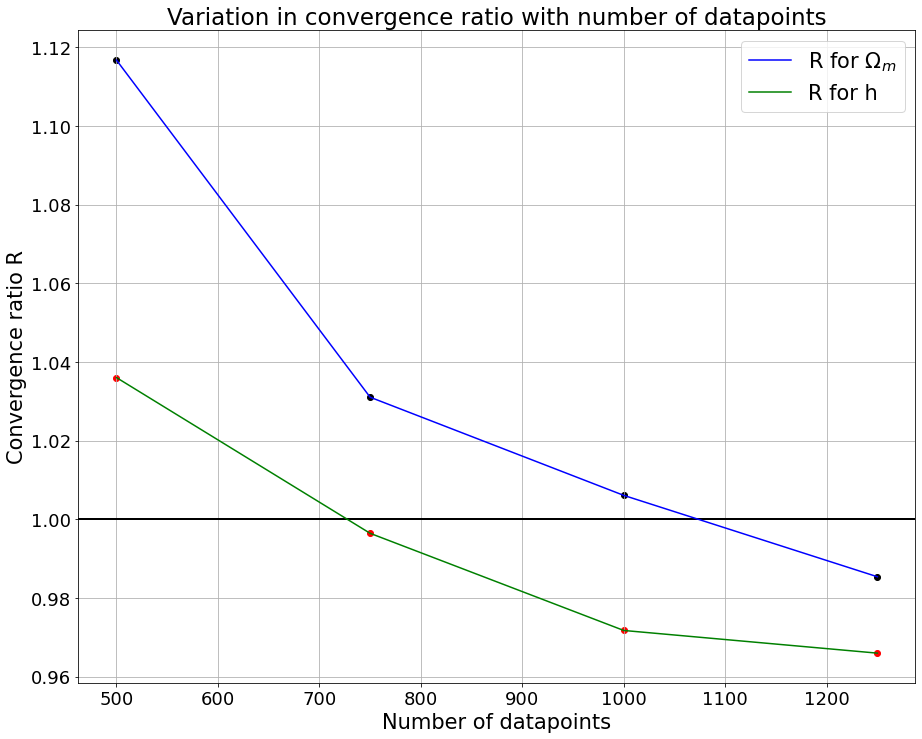

In [27]:
Y = 1.00

fig, ax = plt.subplots(1, figsize=(15,12))
ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.axhline(Y, color='black', linewidth=2)
ax.plot(Num_datapoints, Valu_R_Omega, color='blue', label='R for $\Omega_m$')
ax.scatter(Num_datapoints, Valu_R_Omega, marker='o', color='black')
ax.plot(Num_datapoints, Valu_R_h, color='green', label='R for h')
ax.scatter(Num_datapoints, Valu_R_h, marker='o', color='red')
ax.set_title("Variation in convergence ratio with number of datapoints", fontsize='23')
ax.set_xlabel("Number of datapoints", fontsize='21')
ax.set_ylabel("Convergence ratio R", fontsize='21')
ax.legend(fontsize='21')
plt.show()